In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.preprocessing import normalize

from keras.utils import to_categorical
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def normalise(patches):

    normalised_patches = []
    patch_shape = patches.shape

    for i in tqdm(range(patch_shape[0])):
    
        patch = patches[i, :, :]
        test = normalize(X=patch)
        test = np.reshape(test, (48,32,1))
    
        normalised_patches.append(test)
        
    return np.stack(normalised_patches, axis=0)


def result_vector(array):

    def decode(datum):
        return np.argmax(datum)

    res = []
    for i in range(array.shape[0]):
        datum = array[i]
        decoded_datum = decode(array[i])
        res.append(decoded_datum)

    return res

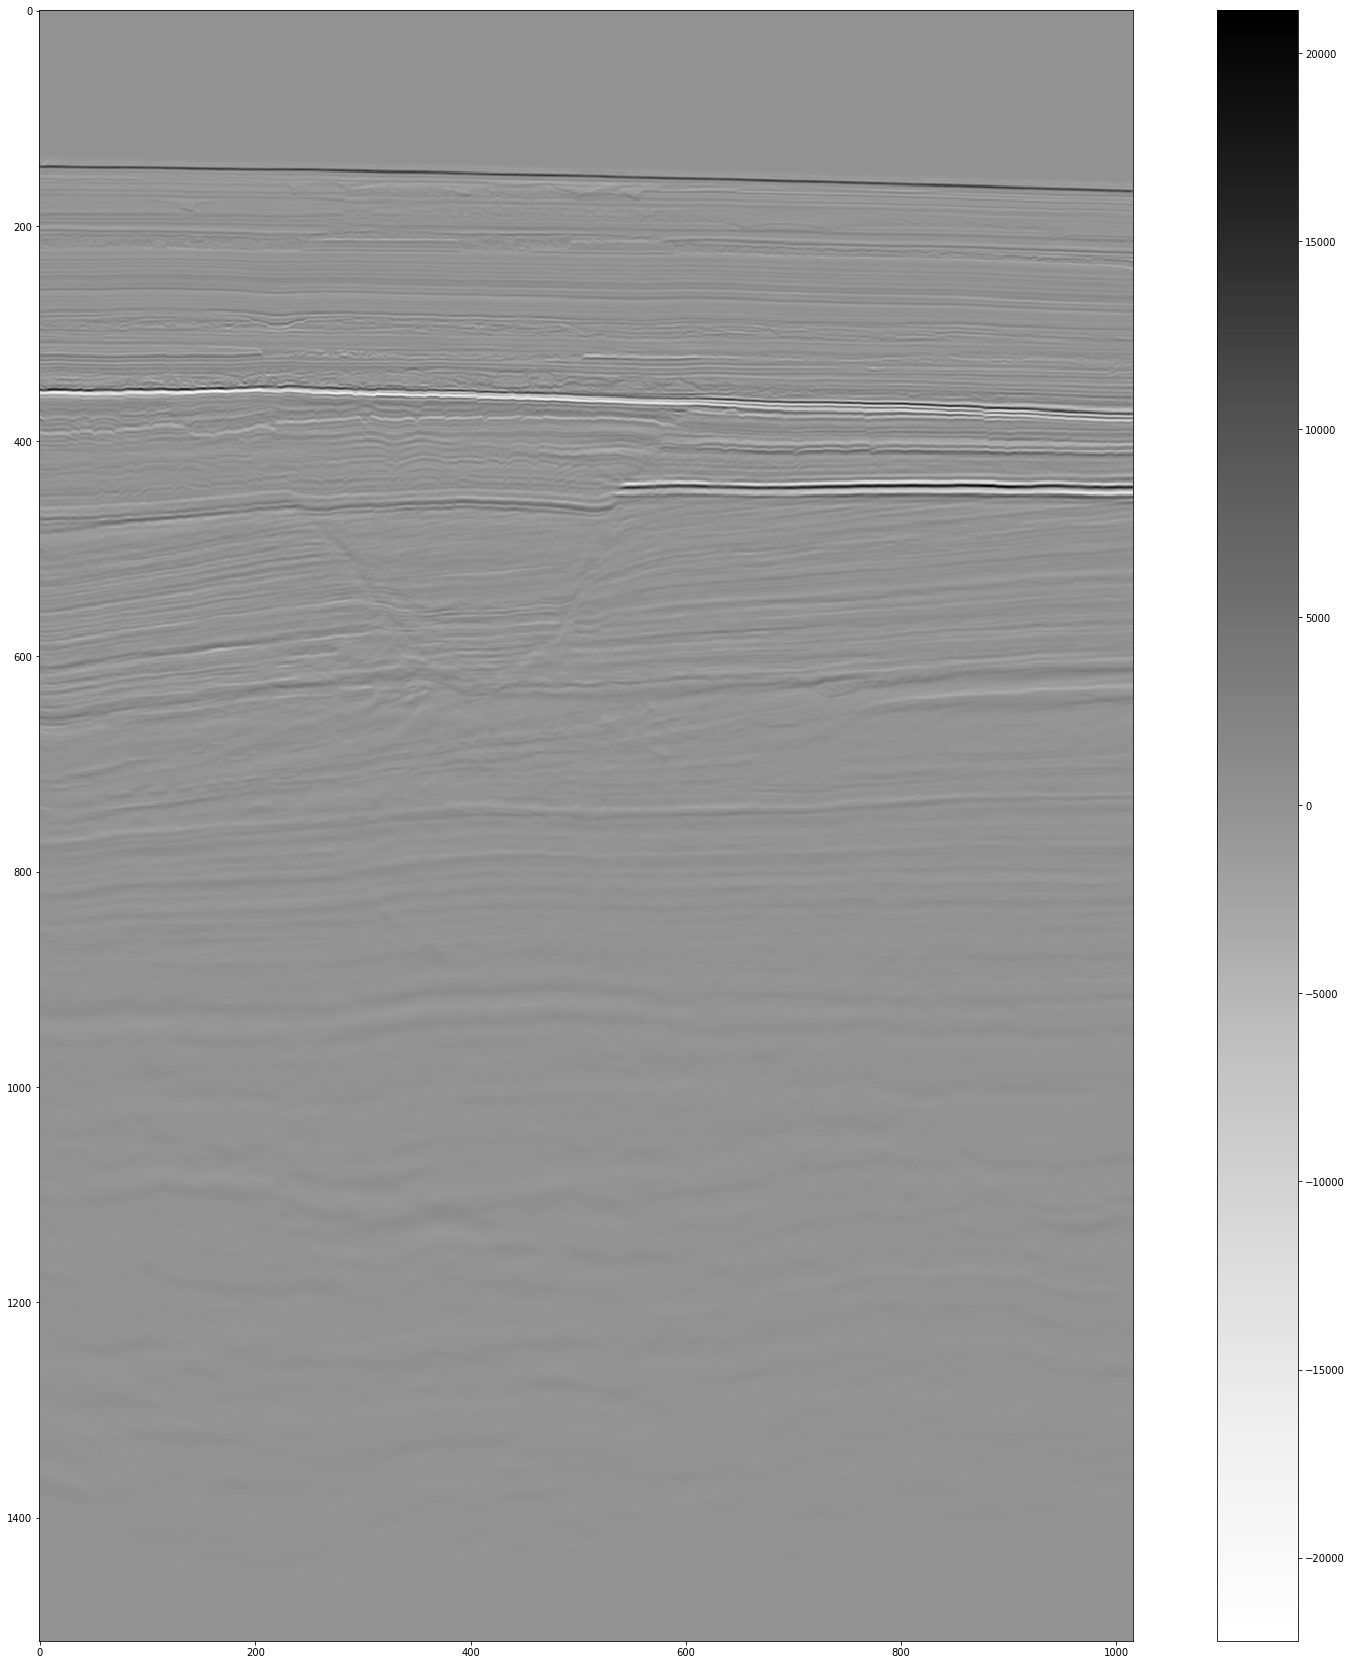

In [3]:
data = np.genfromtxt('CVG_data/CVG_XL1852_fullstack.dat')
data = data.T
plt.figure(figsize=(30,30))
plt.imshow(data, cmap='Greys')
plt.colorbar()

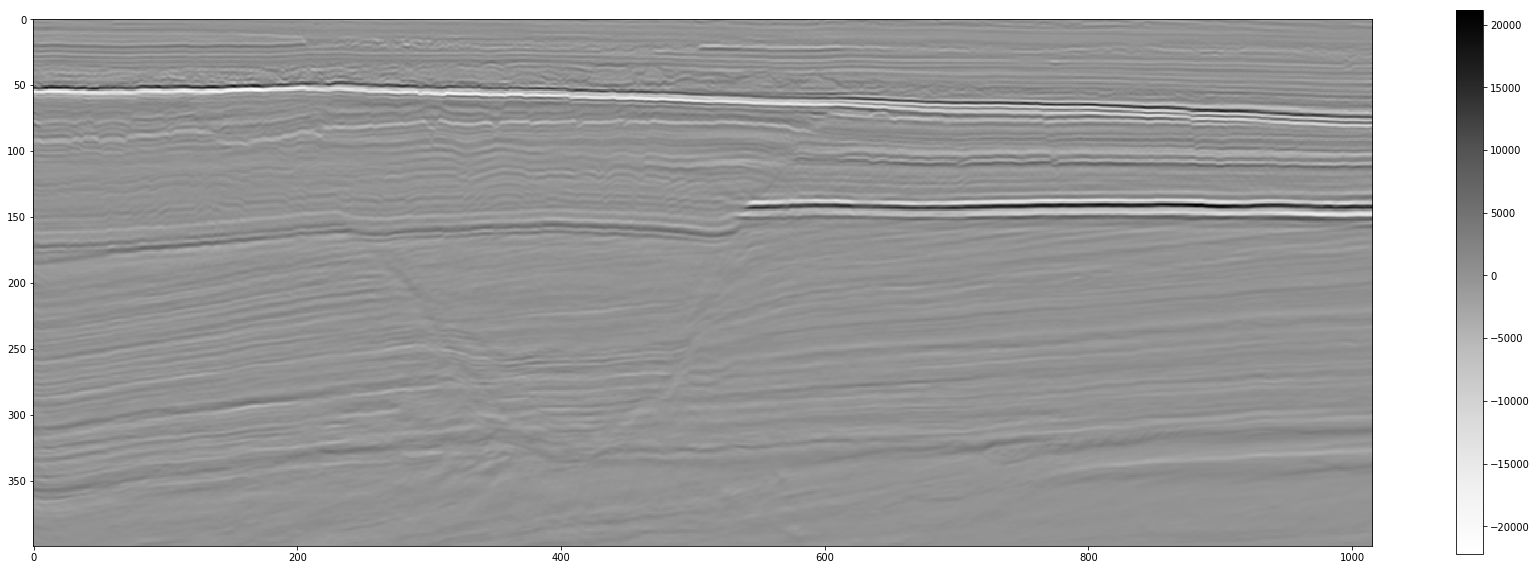

In [4]:
data_subset = data[300:700]

del data

plt.figure(figsize=(30,10))
plt.imshow(data_subset, cmap='Greys')
plt.colorbar()

In [5]:
patches = extract_patches_2d(image=data_subset, patch_size=(48,32))
print(str(patches.shape))

(347705, 48, 32)


In [6]:
normalised_patch_stack = normalise(patches)

del patches

100%|██████████| 347705/347705 [00:19<00:00, 17741.59it/s]


In [8]:
model = load_model('faultCNNmodel.h5')

In [9]:
prediction = model.predict(normalised_patch_stack, verbose=1)

347705/347705 [==============================] - 151s 434us/step


In [10]:
result = result_vector(prediction)
resstack = np.stack(result, axis=0)

np.save(arr=resstack, file='CVG_data/results_XL1852_300700.npy')

print('Complete')

Complete
